In [656]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from datatools import DataGrapher


%matplotlib inline

In [657]:
#Bring in the data

nba = pd.read_csv('./data/nba_analysis_data.csv')
nba.dropna(inplace = True)

In [ ]:
nba_test = pd.read_csv('./data/nba_test_analysis_data.csv')
nba_test = pd

In [658]:
features = ['home_payout', 'away_payout','feature_1', 'feature_2', 
            'feature_3' ,'feature_4', 'feature_5', 'feature_6',
            'feature_7', 'feature_8', 
            'feature_9','feature_10', 'feature_11', 'feature_12', 
            'feature_13', 'feature_14', 'feature_15', 'feature_16',
            'feature_17', 'feature_18', 'feature_19']

In [659]:
nba = nba[nba.lastaway_win == 1]

In [660]:

X_train = nba.drop(columns = ['cover','home_win_margin', 
                        'date', 'dataset','line_cv',
                       'home_starter5', 'win_margin_ratio',
                       'away_starter2', 'away_starter3',
                       'away_starter4', 'away_starter5',
                       'ref_1', 'ref_3', 'crew_referees',
                      'away_pace', 'away_spread',
                        'away_line_cv',  'away_cover','feature_1', 
            'feature_2', 
            'feature_3' ,'feature_4', 'feature_5', 'feature_6',
            'feature_7', 'feature_8', 'teams', 'away_team',
            'feature_9','feature_10', 'feature_11', 'feature_12', 
            'feature_13', 'feature_14', 'feature_15', 'feature_16',
            'feature_17', 'feature_18', 'feature_19',
                       'home_payout', 'away_payout'])


#X = nba[features]
y_train = nba['away_cover']

In [ ]:
X_test= nba_test.drop('cover','home_win_margin', 
                        'date', 'dataset','line_cv',
                       'home_starter5', 'win_margin_ratio',
                       'away_starter2', 'away_starter3',
                       'away_starter4', 'away_starter5',
                       'ref_1', 'ref_3', 'crew_referees',
                      'away_pace', 'away_spread',
                        'away_line_cv',  'away_cover','feature_1', 
            'feature_2', 
            'feature_3' ,'feature_4', 'feature_5', 'feature_6',
            'feature_7', 'feature_8', 'teams', 'away_team',
            'feature_9','feature_10', 'feature_11', 'feature_12', 
            'feature_13', 'feature_14', 'feature_15', 'feature_16',
            'feature_17', 'feature_18', 'feature_19',
                       'home_payout', 'away_payout')

y_test = nba_test.away_cover

In [661]:

nba.shape

(830, 206)

In [662]:
np.where(X.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [663]:

#create interactions and squared terms
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
X_poly = pd.DataFrame(X_poly, 
                      columns = poly.get_feature_names(X_train.columns))
X_poly_test = pd.DataFrame(X_poly_test, 
                           columns = poly.get_feature_names(X_test.columns))


In [666]:

#scaling data to use in various other methods
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_poly)
X_test_scaled = ss.transform(X_poly_test)

In [667]:
from sklearn.decomposition import PCA

In [668]:
pc = PCA(n_components=300)
X_train_pc = pc.fit_transform(X_train_scaled)
X_test_pc = pc.transform(X_test_scaled)


In [669]:
var_exp = pc.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [8.82917057e-02 5.84870256e-02 4.80600005e-02 3.77899684e-02
 3.45485386e-02 3.20764829e-02 2.85602855e-02 2.54742865e-02
 2.49062213e-02 2.26417564e-02 2.19524311e-02 2.10534465e-02
 1.91258306e-02 1.73275127e-02 1.68747001e-02 1.58384929e-02
 1.48170538e-02 1.43344838e-02 1.36764363e-02 1.31948350e-02
 1.26450388e-02 1.23476011e-02 1.21978452e-02 1.15485120e-02
 1.14015068e-02 1.11789487e-02 1.10233406e-02 1.07883202e-02
 1.03542744e-02 1.01046614e-02 9.89349712e-03 9.50696421e-03
 9.35557728e-03 9.04167960e-03 8.87227692e-03 8.44177468e-03
 8.29153483e-03 7.98794418e-03 7.88667545e-03 7.74038258e-03
 7.48510581e-03 7.23195170e-03 7.02694749e-03 6.82025827e-03
 6.70400110e-03 6.36364308e-03 6.21697690e-03 6.05284639e-03
 5.78691434e-03 5.54263026e-03 5.29331476e-03 5.12352245e-03
 5.02485803e-03 4.88896817e-03 4.68214555e-03 4.45055477e-03
 4.33564614e-03 4.12647149e-03 3.87435391e-03 3.80000216e-03
 3.47612092e-03 3.43799351e-03 3.22820180e-03 3.14899

In [670]:
lr = LogisticRegressionCV(Cs=[.0001, .001] , 
                          penalty='l2', 
                          solver ='lbfgs', 
                          cv =5 )
lr.fit(X_train_pc, y_train)
lr.score(X_train_pc, y_train)

0.7636655948553055

In [671]:
lr.score(X_test_pc, y_test)

0.5913461538461539

In [672]:
y_hat_lr = lr.predict(X_train_pc)
y_hat_lrp = lr.predict_proba(X_train_pc)


In [673]:
print(classification_report(y_train, y_hat_lr))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62       110
           1       0.57      0.54      0.55        98

   micro avg       0.59      0.59      0.59       208
   macro avg       0.59      0.59      0.59       208
weighted avg       0.59      0.59      0.59       208



In [674]:
confusion_matrix( y_train, y_hat_lr)

array([[70, 40],
       [45, 53]])

### Naive Bayes

Model seems to work best with bare bones information.  More information confused the model.

In [675]:
nb = GaussianNB()
nb_params = {
    'var_smoothing' : [.05,.1,.15 ] 
    }

In [676]:
gs = GridSearchCV(nb, param_grid=nb_params, scoring='precision')
gs.fit(X_train_pc, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.48159144691898315
{'var_smoothing': 0.1}


/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [677]:
gs.score(X_test_pc, y_test)

0.5882352941176471

In [678]:
y_hat_nb = gs.predict(X_train_pc)
y_hat_nbp = gs.predict_proba(X_train_pc)

In [679]:
print(classification_report(y_test, y_hat_nb))

              precision    recall  f1-score   support

           0       0.57      0.81      0.67       110
           1       0.59      0.31      0.40        98

   micro avg       0.57      0.57      0.57       208
   macro avg       0.58      0.56      0.53       208
weighted avg       0.58      0.57      0.54       208



In [680]:
confusion_matrix( y_train, y_hat_nb)

array([[89, 21],
       [68, 30]])

In [681]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [682]:
model = Sequential()
model.add(Dense(300, 
                activation = 'relu',
                input_dim = X_train_scaled.shape[1]))
#model.add(Dense(200, activation = 'relu'))

#model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #output layer 

In [683]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',
              metrics = ['accuracy', 'precision'])
model.fit(X_train_scaled, 
          y_train, epochs =4, 
          batch_size= 128, 
          validation_data=(X_test_scaled, y_test))

Train on 622 samples, validate on 208 samples
Epoch 1/15
622/622 [==============================] - 1s 2ms/step - loss: 3.0134 - acc: 0.5064 - val_loss: 3.5816 - val_acc: 0.5048
Epoch 2/15
622/622 [==============================] - 1s 873us/step - loss: 2.7704 - acc: 0.6238 - val_loss: 3.2331 - val_acc: 0.5192
Epoch 3/15
622/622 [==============================] - 0s 754us/step - loss: 1.5742 - acc: 0.7251 - val_loss: 2.7778 - val_acc: 0.5625
Epoch 4/15
622/622 [==============================] - 1s 824us/step - loss: 1.3745 - acc: 0.7653 - val_loss: 2.8339 - val_acc: 0.5577
Epoch 5/15
622/622 [==============================] - 1s 814us/step - loss: 0.9216 - acc: 0.8457 - val_loss: 3.0197 - val_acc: 0.5288
Epoch 6/15
622/622 [==============================] - 0s 719us/step - loss: 0.6882 - acc: 0.8617 - val_loss: 2.5012 - val_acc: 0.6058
Epoch 7/15
622/622 [==============================] - 1s 863us/step - loss: 0.5099 - acc: 0.9132 - val_loss: 2.6589 - val_acc: 0.5913
Epoch 8/15
622/622

In [612]:
y_hat_nn = model.predict(X_train_scaled)
y_hat_nnp = model.predict_proba(X_train_scaled)

In [685]:
rf = RandomForestClassifier()
rf_params = {'max_depth' : [50,120],
             'min_samples_split' : [125, 150]}

In [687]:
gs = GridSearchCV(rf, param_grid=rf_params)
gs.fit(X_train_pc, y_train)
print(gs.best_score_)
print(gs.best_params_)

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0

0.5482315112540193
{'max_depth': 120, 'min_samples_split': 150}


/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [688]:
gs.score(X_test_pc, y_test)

0.5625

In [690]:
y_hat_rf = gs.predict(X_train_pc)
y_hat_rfp = gs.predict_proba(X_train_pc)

In [691]:
print(classification_report(y_test, y_hat_rf))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62       110
           1       0.54      0.44      0.49        98

   micro avg       0.56      0.56      0.56       208
   macro avg       0.56      0.56      0.55       208
weighted avg       0.56      0.56      0.56       208



In [692]:
confusion_matrix( y_test, y_hat_rf)

array([[74, 36],
       [55, 43]])

In [693]:
#modifying train and testing data to allow for changing prob thresholds and printing the 
#roc curves 
#Random Forest
nba.loc[:, 'actual_y'] = y_train
nba.loc[:, 'predicted_label_rf'] = y_hat_rf
nba.loc[:, 'predicted_proba_rfp'] = y_hat_rfp[:, 1]

#Bayesian

nba.loc[:, 'predicted_label_nb'] = y_hat_nb
nba.loc[:, 'predicted_proba_nbp'] = y_hat_nbp[:, 1]

nba.loc[:, 'predicted_label_lr'] = y_hat_lr
nba.loc[:, 'predicted_proba_lrp'] = y_hat_lrp[:, 1]

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [694]:
from sklearn.metrics import roc_curve, auc

In [697]:
fpr, tpr, _ = roc_curve(y_test, X_test['predicted_proba_lrp'])
roc_auc = auc(fpr, tpr)

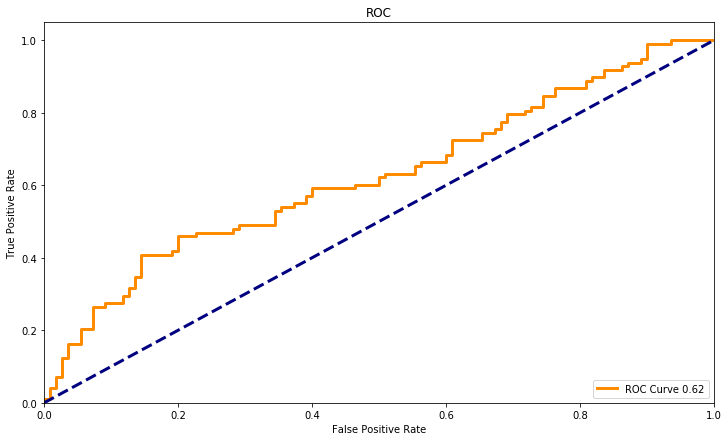

In [698]:
# Plot 
plt.figure(figsize = (12,7))
line_width = 3

plt.plot(fpr, tpr, lw = line_width, color="darkorange", label = "ROC Curve %.2f" % roc_auc)
plt.plot([0,1], [0, 1], lw = line_width, linestyle="--", color="navy")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conditions = [
    (nba['line_cv'] <0), 
    (nba['line_cv'] > 0),
    (nba['line_cv'] == 0)]
choices = [.909, -1, 0]
nba['away_payout'] = np.select(conditions, choices)

In [ ]:
#test payouts
conditions = [
    (nba_test['line_cv'] <0), 
    (nba_test['line_cv'] > 0),
    (nba_test['line_cv'] == 0)]
choices = [.909, -1, 0]
nba_test['away_payout'] = np.select(conditions, choices)

In [623]:
for prob in range(40, 65, 1):
    proba = prob/100
    
    nba.loc[:, 'predicted_label']= nba['predicted_proba_lrp'].map(
    lambda p: 1 if p > proba else 0)
    
#     X_train.loc[:, 'predicted_label']= X_train['predicted_proba_rfp'].map(
#     lambda p: 1 if p > proba else 0)
    
#    results = X_test[X_test['predicted_label']==1]
#     print('Test  ' + str(proba))
#     print (confusion_matrix(y_test, nba['predicted_label']))
   results_neg = nba[nba['predicted_label']==0]
   print ("Return of Home Games: ", results_neg.home_payout.sum())
#     print(' Train  ' + str(proba))
#     print(confusion_matrix(y_train, X_train['predicted_label']))

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Test  0.4
[[ 79 184]
 [ 95 195]]
Test  0.41
[[ 82 181]
 [ 96 194]]
Test  0.42
[[ 84 179]
 [102 188]]
Test  0.43
[[ 88 175]
 [106 184]]
Test  0.44
[[ 94 169]
 [107 183]]
Test  0.45
[[101 162]
 [112 178]]
Test  0.46
[[102 161]
 [115 175]]
Test  0.47
[[102 161]
 [120 170]]
Test  0.48
[[105 158]
 [126 164]]
Test  0.49
[[113 150]
 [128 162]]
Test  0.5
[[116 147]
 [134 156]]
Test  0.51
[[118 145]
 [135 155]]
Test  0.52
[[123 140]
 [137 153]]
Test  0.53
[[127 136]
 [140 150]]
Test  0.54
[[132 131]
 [145 145]]
Test  0.55
[[139 124]
 [149 141]]
Test  0.56
[[142 121]
 [151 139]]
Test  0.57
[[147 116]
 [158 132]]
Test  0.58
[[150 113]
 [166 124]]
Test  0.59
[[155 108]
 [170 120]]
Test  0.6
[[159 104]
 [173 117]]
Test  0.61
[[165  98]
 [179 111]]
Test  0.62
[[170  93]
 [181 109]]
Test  0.63
[[179  84]
 [185 105]]
Test  0.64
[[186  77]
 [188 102]]
